In [132]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
from collections import Counter
import plotly.express as px
import datetime
from datetime import datetime
import time


In [77]:
Data = pd.read_csv('Data_HACC.csv')
col_names = list(Data.columns)
DataA = pd.read_csv('Data_HACC.csv',nrows=6202)
DataB = pd.read_csv('Data_HACC.csv',skiprows=6202, nrows=10452)
DataB.columns = col_names
powerdata = pd.read_csv('Description-Table 1.csv',skiprows=6)
power = powerdata['Power (kW)']
minkWh = powerdata['1-minute kWh']
totalkwh = powerdata['total kWh']
timemin = [t for t in range(len(power))]


In [175]:
pow = pd.read_csv('Power-Data-Table 1.csv',usecols=['Start Date and Time','Power (kW)'])
#pow['Power (kW)'].tolist()
tot = [0]
months = [Data['Start Time'].tolist()[i][0:2] for i in range(len(Data['Start Time']))]
monthsA = [DataA['Start Time'].tolist()[i][0:2] for i in range(len(DataA['Start Time']))]
monthsB = [DataB['Start Time'].tolist()[i][0:2] for i in range(len(DataB['Start Time']))]
pow = pow.assign(oneminkWh = pow['Power (kW)'] / 60)

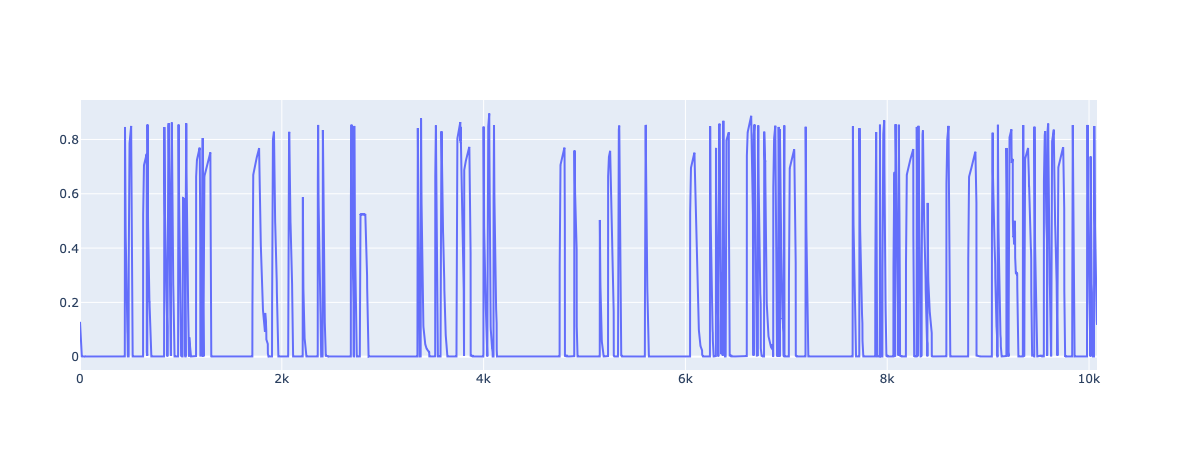

In [83]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=[t for t in range(len(pow))], y=pow['oneminkWh'].tolist(), mode='lines', name='lines'))
fig.show()

In [84]:
data ={'Station':['A','B'],'#Transactions':[len(DataA), len(DataB)]}
df = pd.DataFrame(data)

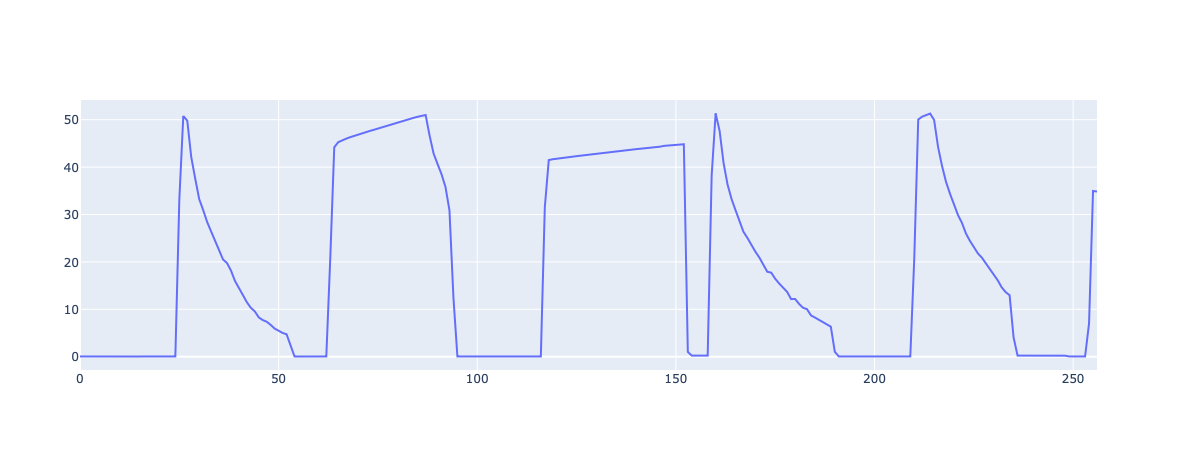

In [88]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=timemin, y=power.tolist(), mode='lines', name='lines'))
fig.show()

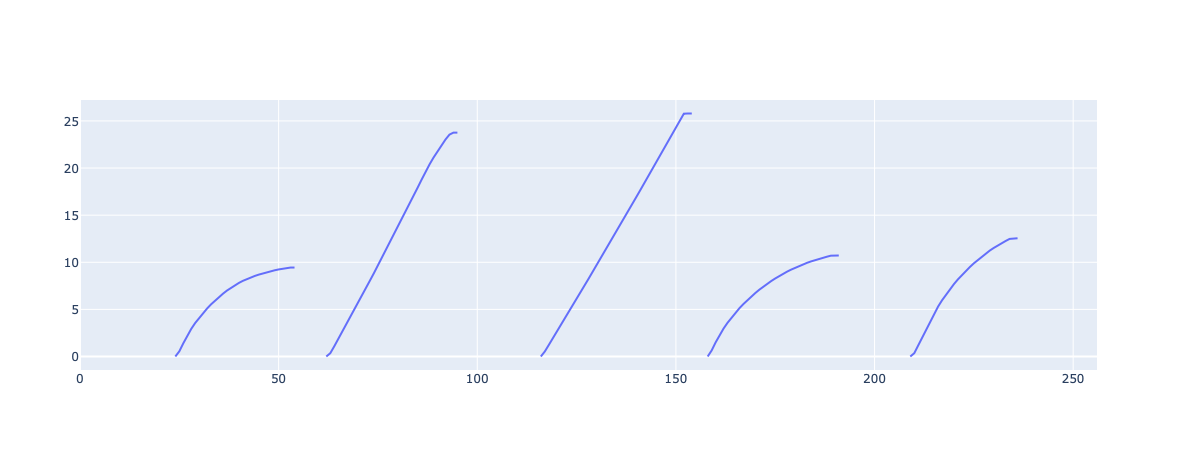

In [89]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=timemin, y=totalkwh.tolist(), mode='lines', name='lines'))
fig.show()

In [191]:
portlabels = ['CHADEMO','DCCOMBOTYP1']
paymentlabels = ['RFID','CREDITCARD']
DataApaymentmode = DataA['Payment Mode'].values
DataApporttype = DataA['Port Type'].values
DataBpaymentmode = DataB['Payment Mode'].values
DataBpporttype = DataB['Port Type'].values
paymode = Data['Payment Mode'].values
portmode = Data['Port Type'].values
pay = [list(Counter(paymode).values())[0],list(Counter(paymode).values())[1]]
port = [list(Counter(portmode).values())[0],list(Counter(portmode).values())[1]]
paysizesA = [list(Counter(DataApaymentmode).values())[0],list(Counter(DataApaymentmode).values())[1]]
portsizesA = [list(Counter(DataApporttype).values())[0],list(Counter(DataApporttype).values())[1]]
paysizesB = [list(Counter(DataBpaymentmode).values())[0],list(Counter(DataBpaymentmode).values())[1]]
portsizesB = [list(Counter(DataBpporttype).values())[0],list(Counter(DataBpporttype).values())[1]]
colors=['purple','skyblue']

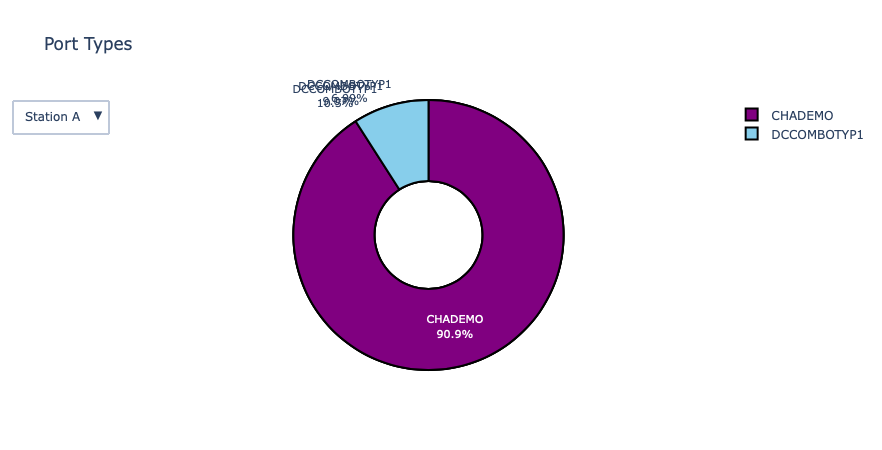

In [192]:
##port type pie chart

fig = go.Figure()
fig.add_trace(go.Pie(labels=portlabels,values=portsizesA,name="Port Type"))
fig.add_trace(go.Pie(labels=portlabels,values=portsizesB,name="Port Type"))
fig.add_trace(go.Pie(labels=portlabels,values=port,name="Port Type"))

fig.update_layout(updatemenus=[
        go.layout.Updatemenu(
            active=0,
            buttons=list([
                dict(label="Station A",
                     method="restyle",
                     args=[{"visible": [True, False, False]},
                           {"title": "Station A"}]),
                dict(label="Station B",
                     method="restyle",
                     args=[{"visible": [False, True, False]},
                           {"title": "Station B"}]),
                dict(label="Both",
                     method="restyle",
                     args=[{"visible": [False, False, True]},
                           {"title": "Both"}])]),)])
fig.update_layout(title_text="Port Types")                     
fig.update_traces(hole=.4,hoverinfo='value', textinfo='label+percent', textfont_size=11, marker=dict(colors=colors, line=dict(color='#000000', width=2)))
fig.show()

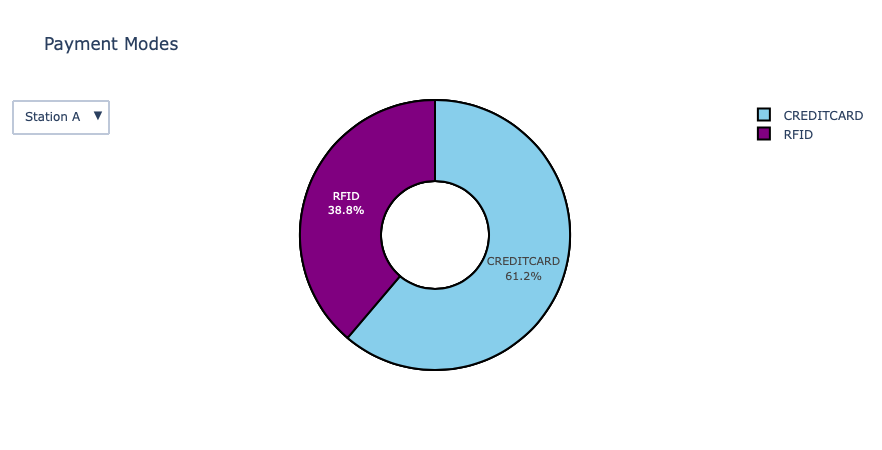

In [193]:
##Payment type pie chart
fig = go.Figure()
fig.add_trace(go.Pie(labels=paymentlabels,values=paysizesA,name="Payment Modes"))
fig.add_trace(go.Pie(labels=paymentlabels,values=paysizesB,name="Payment Modes"))
fig.add_trace(go.Pie(labels=paymentlabels,values=pay,name="Payment Modes"))

fig.update_layout(updatemenus=[
        go.layout.Updatemenu(
            active=0,
            buttons=list([
                dict(label="Station A",
                     method="restyle",
                     args=[{"visible": [True, False, False]},
                           {"title": "Station A"}]),
                dict(label="Station B",
                     method="restyle",
                     args=[{"visible": [False, True, False]},
                           {"title": "Station B"}]),
                dict(label="Both",
                     method="restyle",
                     args=[{"visible": [False, False, True]},
                           {"title": "Both"}])]),)])
fig.update_layout(title_text="Payment Modes")                     
fig.update_traces(hole=.4,hoverinfo='value', textinfo='label+percent', textfont_size=11, marker=dict(colors=colors, line=dict(color='#000000', width=2)))
fig.show()

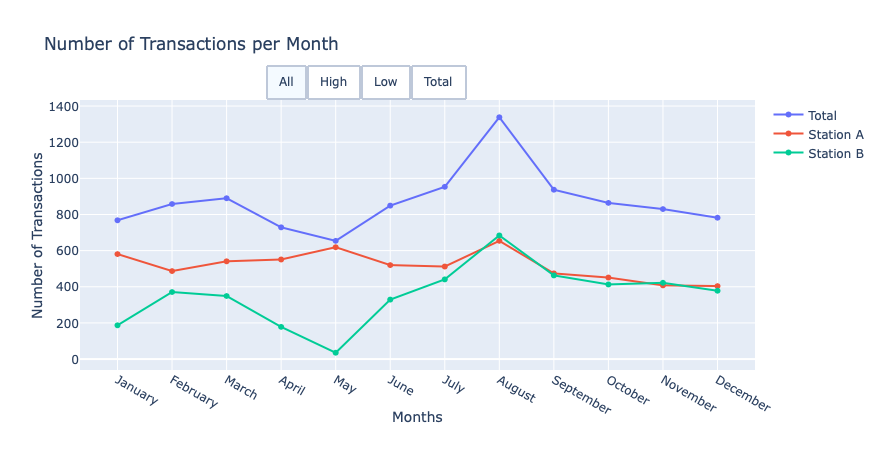

In [190]:
## Transactions in line chart
month = ['January', 'February', 'March', 'April', 'May', 'June', 'July',
         'August', 'September', 'October', 'November', 'December']

Jan = months.count('01')
Feb = months.count('02')
Mar = months.count('03')
Apr = months.count('04')
May = months.count('05')
Jun = months.count('06')
Jul = months.count('07')
Aug = months.count('08')
Sep = months.count('09')
Oct = months.count('10')
Nov = months.count('11')
Dec = months.count('12')

JanA = monthsA.count('01')
FebA = monthsA.count('02')
MarA = monthsA.count('03')
AprA = monthsA.count('04')
MayA = monthsA.count('05')
JunA = monthsA.count('06')
JulA = monthsA.count('07')
AugA = monthsA.count('08')
SepA = monthsA.count('09')
OctA = monthsA.count('10')
NovA = monthsA.count('11')
DecA = monthsA.count('12')

JanB = monthsB.count('01')
FebB = monthsB.count('02')
MarB = monthsB.count('03')
AprB = monthsB.count('04')
MayB = monthsB.count('05')
JunB = monthsB.count('06')
JulB = monthsB.count('07')
AugB = monthsB.count('08')
SepB = monthsB.count('09')
OctB = monthsB.count('10')
NovB = monthsB.count('11')
DecB = monthsB.count('12')

fig = go.Figure()
fig.add_trace(go.Scatter(x=month,y=[Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec],name='Total'))
fig.add_trace(go.Scatter(x=month,y=[JanA,FebA,MarA,AprA,MayA,JunA,JulA,AugA,SepA,OctA,NovA,DecA],name='Station A'))
fig.add_trace(go.Scatter(x=month,y=[JanB,FebB,MarB,AprB,MayB,JunB,JulB,AugB,SepB,OctB,NovB,DecB],name='Station B'))
fig.update_layout(updatemenus=[go.layout.Updatemenu(type="buttons",direction="right",active=0,x=0.57,y=1.13,
            buttons=list([
                dict(label="All",
                     method="update",
                     args=[{"visible": [True, True, True]},
                           {"title": "All transactions per Month"}]),
                dict(label="High",
                     method="update",
                     args=[{"visible": [False, True, False]},
                           {"title": "Station A transactions per Month"}]),
                dict(label="Low",
                     method="update",
                     args=[{"visible": [False, False, True]},
                           {"title": "Station B transactions per Mo"}]),
                dict(label="Total",
                     method="update",
                     args=[{"visible": [True, False, False]},
                           {"title": "Total transactions"}]),]),)])
fig.update_layout(title='Number of Transactions per Month', xaxis_title='Months',yaxis_title='Number of Transactions')
fig.show()